# Project: Predicting Which Employees May Quit

## Section 1: Data Wrangling

#### Step 1. Load the relevent datasets.

In [1]:
import pandas as pd
import numpy as np
import os

#### 1a. Load 1st dataset.

About the 1st dataset:
* Column *number_project*, e.g. the value 2 means the employee did two projects.
* Column *average_monthly_hours* is the average number of hours worked on a monthly basis for that employee, e.g. 157 hours means the employee works on average 157 hours a month.
* Column *time_spend_company* the values are in years, e.g. 3 means the employee has been at the company for 3 years.
* Column *Work_accident* is if an employee had an incident that involved disciplinary action. e.g. 0 means employee did not have an incident, 1 means employee did have an incident.
* Column *left* means if the employee left the company or not. e.g. 0 means employee did not leave company, 1 means employee did leave company.
* Column *promotion_last_5years* means if the employee received a promotion within the last 5 years or not. e.g. 0 means employee did not receive promotion, 1 means employee did receive promotion. 

Note: Each row/record represents a different employee.

In [2]:
# Read in csv file.
pd.read_csv('/Users/deepshikasharma/Desktop/predicting_employee_retention/hr_data.csv')

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [3]:
# Save dataset as variable.
hr_df = pd.read_csv('/Users/deepshikasharma/Desktop/predicting_employee_retention/hr_data.csv')

##### 1b. Get basic information about 1st dataset.

In [4]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [5]:
# View which columns are categorical.
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [6]:
# Display unique values in categical columns.
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [7]:
# How many rows are in this dataset?
len(hr_df)

14999

In [8]:
# How many columns are in this dataset?
len(hr_df.columns)

9

In [9]:
# What is the shape of the dataset (rows, columns)?
hr_df.shape

(14999, 9)

##### 2a. Load 2nd Dataset

About the 2nd Dataset:
* Column *Employee #* is a unique ID number given to each employee.
* Column *satisfiaction_level* is the employee satistication score. e.g. How satisfied the employee feels from 0 to 1. 0 being not satisfied at all, and 1 to being perfectly satisfied. 
* Column *last_evaluation* is the last employee evaluation score. e.g. Job performance score for the employee from 0 to 1. 0 being failed performance to 1 being perfect performance.

In [10]:
# Read in csv file.
pd.read_csv('/Users/deepshikasharma/Desktop/predicting_employee_retention/employee_satisfaction_evaluation.csv')

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [11]:
# Save as variable.
emp_sat_eval = pd.read_csv('/Users/deepshikasharma/Desktop/predicting_employee_retention/employee_satisfaction_evaluation.csv')

##### 2b. Checking records.

Check that the number of records (rows) in the 2nd dataset match the same number of recrods in the 1st dataset.

In [12]:
# How many rows are in this dataset?
len(emp_sat_eval)

14999

In [13]:
# What is the shape (rows, columns) of the dataset?
emp_sat_eval.shape

(14999, 3)

#### Step 2: Formating & Cleaning Datasets.

##### 2a. Merge the two datasets.

In [14]:
main_df = hr_df.set_index('employee_id').join(emp_sat_eval.set_index('EMPLOYEE #'))

In [15]:
main_df = main_df.reset_index()

In [16]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


##### 2b. Check for missing values and where the missing values are.

In [17]:
main_df.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

Most of the null or missing values are coming from the columns *satisfiaction_level* and *last_evaluation*.

In [18]:
main_df[main_df.isnull().any(axis=1)]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
19,1140,5,262,5,0,1,0,sales,low,NaN,0.89
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN


##### 2c. Fill in missing values.

In [19]:
main_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
main_df.fillna(main_df.mean(), inplace=True)

In [21]:
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


##### 2d. Remove unnecessary column(s).

In [22]:
# Removing column 'employee_id' because it is unnecessary to have for the algorithims.
main_df_final = main_df.drop(columns='employee_id')

In [23]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [24]:
main_df_final[main_df_final.left == 1]['department']

0          sales
1          sales
2          sales
3          sales
4          sales
          ...   
14994    support
14995    support
14996    support
14997    support
14998    support
Name: department, Length: 3571, dtype: object

## Section 2: Exploratory Data Analysis

### Graphs

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Descriptive Statistics

In [26]:
import warnings

In [27]:
warnings.filterwarnings('ignore')

##### 1a. Univariate Analysis of the *left* column.

In [28]:
# How many employees are in each department?
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

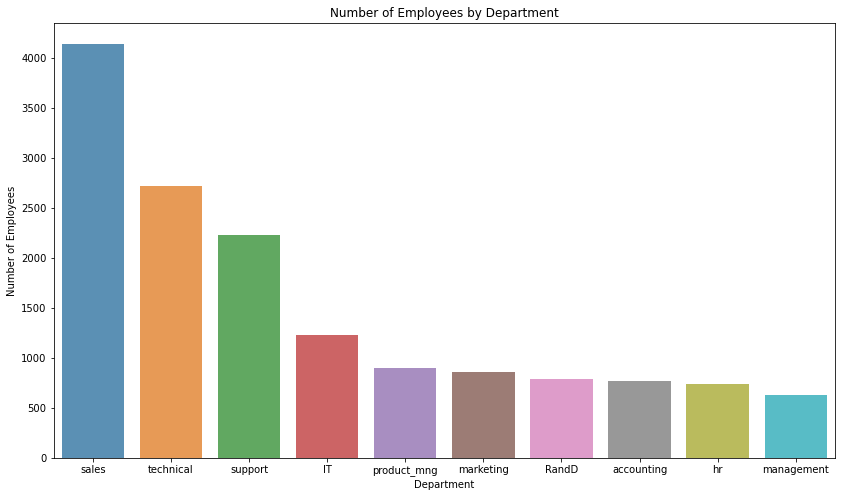

In [29]:
# Graph the number of employees in each department.
department_count = main_df_final['department'].value_counts()
department_count = department_count[:10,]
plt.figure(figsize = (14,8))
sns.barplot(department_count.index, department_count.values, alpha = 0.8)
plt.title('Number of Employees by Department')
plt.ylabel('Number of Employees', fontsize = 10)
plt.xlabel('Department', fontsize = 10)
plt.show()

##### 1b. Bivariate Analysis of the *left* and *department column*.

In [30]:
# Group values by the 'department' column to aggregated total metrics for each department.
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [31]:
left_graph = main_df_final.groupby('department').sum()

In [32]:
left_graph.reset_index()

,department,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
0,IT,4683,248119,4256,164,273,3,758.17283,879.452250
1,RandD,3033,158030,2650,134,121,27,487.80000,560.446125
2,accounting,2934,154292,2702,96,204,14,446.68283,550.706125
3,hr,2701,146828,2480,89,215,15,442.53566,524.006125
4,management,2432,126787,2711,103,91,69,391.76566,456.234499
5,marketing,3164,171073,3063,138,203,43,530.62283,613.946125
6,product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
7,sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
8,support,8479,447490,7563,345,555,20,1377.90849,1611.534499
9,technical,10548,550793,9279,381,697,28,1653.37264,1961.930624


In [33]:
left_graph = left_graph.drop(['number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years',
                'satisfaction_level','last_evaluation'], axis = 1, inplace = False)

In [34]:
print(left_graph)

             left
department       
IT            273
RandD         121
accounting    204
hr            215
management     91
marketing     203
product_mng   198
sales        1014
support       555
technical     697


In [35]:
left_graph = left_graph.reset_index()

In [36]:
print(left_graph)

    department  left
0           IT   273
1        RandD   121
2   accounting   204
3           hr   215
4   management    91
5    marketing   203
6  product_mng   198
7        sales  1014
8      support   555
9    technical   697


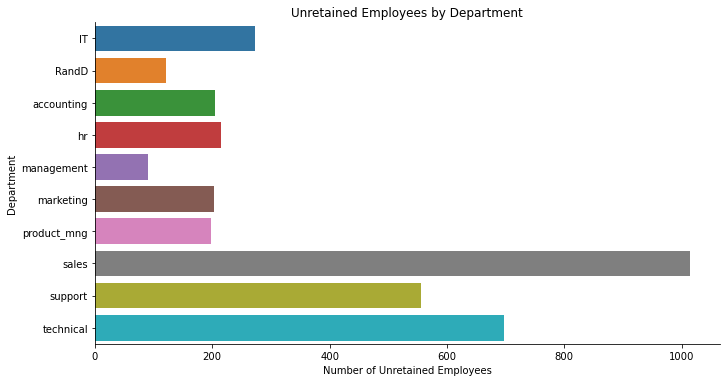

In [37]:
ax = sns.catplot(data=left_graph, y='department', x='left', kind = 'bar', height=5, aspect=2)
ax.set(xlabel = 'Number of Unretained Employees', ylabel = 'Department', title = 'Unretained Employees by Department')

In [38]:
# Group values by the 'department' column to aggregated average metrics for each department.
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


##### 1c. Employee Retention Rate

In [39]:
# How many employees have left? How many have stayed?
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Out of 14,999 employees, 11,428 have stayed and 3,571 have left the company.

In [40]:
# What is the retention rate?
retention_rate = (11428 / 14999) * 100

In [41]:
print(retention_rate)

76.19174611640777


The retention rate is 76%.

Text(0, 0.5, 'Number of Employees')

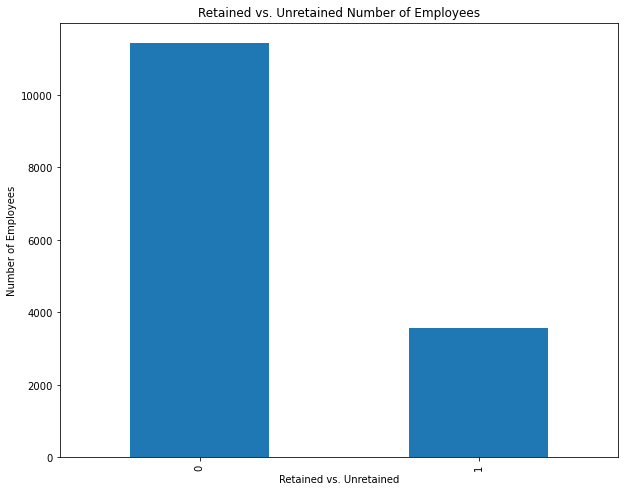

In [42]:
left = main_df_final['left'].value_counts()
left.plot(kind = 'bar', figsize = (10,8))
plt.title('Retained vs. Unretained Number of Employees', fontsize = 12)
plt.xlabel('Retained vs. Unretained', fontsize = 10)
plt.ylabel('Number of Employees', fontsize = 10)

#### Step 2: Correlation Matrix

No handles with labels found to put in legend.


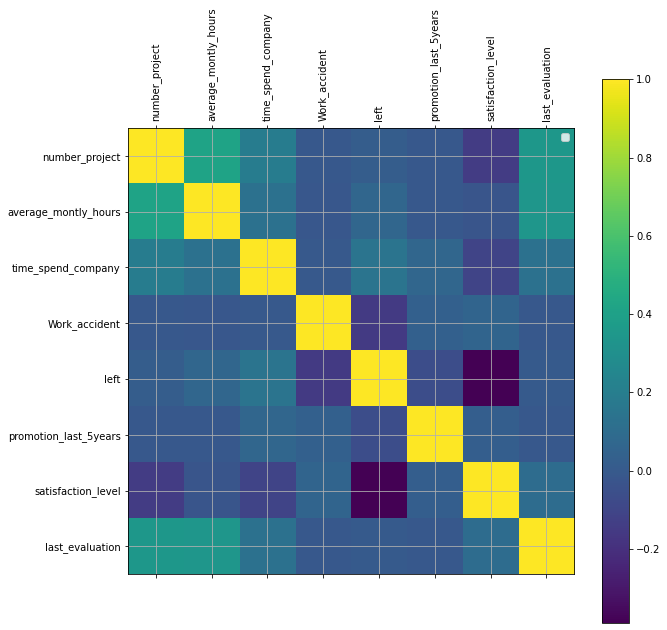

In [43]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    ax.legend()
    ax.grid(True)
    
plot_corr(main_df_final)

## Section 3: Processing Data for ML

### One Hot Encoding

#### Step 1: Pre-processing Data for ML Classifiers

##### 1a. One Hot Encode Categorical Data

In [44]:
categorial = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorial, drop_first=True)

In [45]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


##### 1b. Check data after One Hot Encoding Categorical Data

In [46]:
# What is the new number of rows?
len(main_df_final.columns)

19

In [47]:
# Is the number of employees who left still the same? Yes.
len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [48]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

## Section 4: Classification Models

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Model 1: Logistic Regression

#### Step 1: Create Train & Test Splits

In [50]:
# Remove the label values from our training data.
X = main_df_final.drop(['left'],axis=1).values

# Assign those labeled values to our Y dataset.
y = main_df_final['left'].values

In [51]:
# Split it to a 70:30 Ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Step 2: Data Normalization 

##### 2a. Normalize the Dataset

In [52]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.650960,1.692276,1.717139,-0.412864,-0.143902,0.644835,1.551671,-0.236471,-0.230346,-0.225257,4.742119,-0.246630,-0.24858,-0.615113,-0.421362,-0.474434,-0.970619,-0.870823
1,0.161792,1.352547,-1.025842,-0.412864,-0.143902,-0.163356,0.614605,-0.236471,-0.230346,-0.225257,-0.210876,-0.246630,-0.24858,-0.615113,-0.421362,2.107775,-0.970619,1.148340
2,1.787296,1.592356,-0.340097,-0.412864,-0.143902,-1.860557,1.141705,-0.236471,-0.230346,-0.225257,-0.210876,4.054652,-0.24858,-0.615113,-0.421362,-0.474434,1.030270,-0.870823
3,-0.650960,0.413294,1.717139,2.422102,-0.143902,1.170159,0.438905,-0.236471,-0.230346,-0.225257,-0.210876,-0.246630,-0.24858,-0.615113,-0.421362,2.107775,-0.970619,1.148340
4,-0.650960,0.233437,-0.340097,-0.412864,-0.143902,-0.446223,0.614605,-0.236471,-0.230346,-0.225257,-0.210876,-0.246630,-0.24858,1.625717,-0.421362,-0.474434,-0.970619,-0.870823


#### Step 3: Handling of Imbalanced Dataset

##### 3a. Oversampling of Minority Outcomes using SMOTE Technique

In [54]:
from imblearn.over_sampling import SMOTE

In [56]:
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

In [57]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_model = LogisticRegression(random_state = 0)
log_model.fit(X_res, y_res)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2609  837]
 [ 205  849]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83      3446
           1       0.50      0.81      0.62      1054

    accuracy                           0.77      4500
   macro avg       0.72      0.78      0.73      4500
weighted avg       0.83      0.77      0.78      4500



### Model 2: Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
tree_predictions = tree_model.predict(X_test)
tree_score = tree_model.score(X_test, y_test)

In [58]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(tree_predictions, y_test)))
print(confusion_matrix(y_test, tree_predictions))
print(classification_report(y_test, tree_predictions))

Accuracy 97.31%
[[3361   78]
 [  43 1018]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3439
           1       0.93      0.96      0.94      1061

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500



### Model 3: Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
forest_predictions = forest_model.predict(X_test)
forest_score = forest_model.score(X_test, y_test)

In [62]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(forest_predictions, y_test)))
print(confusion_matrix(y_test, forest_predictions))
print(classification_report(y_test, forest_predictions))

Accuracy 98.80%
[[3428   11]
 [  43 1018]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3439
           1       0.99      0.96      0.97      1061

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



## Section 5: Feature Importance 

Feature important done with Random Forest model.

In [63]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [64]:
feature_importance = pd.DataFrame(forest_model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                columns=['importance']).sort_values('importance',ascending=False)

In [65]:
print(feature_importance)

    importance
5     0.297866
2     0.186022
0     0.182853
1     0.162828
6     0.127215
3     0.010280
16    0.007745
15    0.003918
13    0.003696
17    0.003375
14    0.002932
4     0.002074
8     0.001847
7     0.001803
9     0.001522
10    0.001489
11    0.001474
12    0.001062


The three most important variables affecting employee retention in order are: promotion within the last five years, time spent at the company, and number of projects worked on.